In [3]:
#pip install qiskit

In [4]:
#pip install qiskit[visualization]

In [5]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import numpy as np
import math as m

In [6]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rz(1.5707963267948966, qreg_q[0])
circuit.sx(qreg_q[0])
circuit.rz(1.5707963267948966, qreg_q[0])
circuit.rz(1.5707963267948966, qreg_q[1])
circuit.sx(qreg_q[1])
circuit.rz(1.5707963267948966, qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[3])

In [7]:
print("Depth: ", circuit.depth())

Depth:  7


In [8]:
print("Size: ", circuit.size())

Size:  11


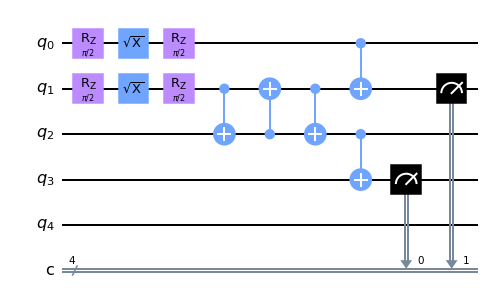

In [9]:
circuit.measure(qreg_q[3], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.draw('mpl')

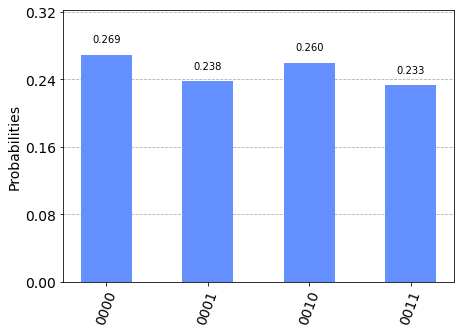

In [10]:
sim = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(circuit,sim,shots=1024)
qiskit.visualization.plot_histogram(job.result().get_counts())